In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, lil_matrix, hstack, vstack, linalg
import numpy.matlib
import pandas as pd
import matplotlib.patches as patches
import matplotlib.colors as colors
import Q2Q1FEM
import Q2Q1OPT
import PolyFEM
import time

In [8]:
nelm = 32
wid = 1/3
Node,Element,NodeBC=Q2Q1FEM.RecSquareMeshQ2(nelm,wid)
Node_P,Element_P,NodeBC_P=Q2Q1FEM.RecSquareMeshQ1(nelm,wid) #Don't use NodeBC_P!!!!(NodeBC_P contains the value of the velocity🥶)
fem_NElem = Element.shape[0]
fem_NElem_P = Element_P.shape[0]
Volfrac = 0.5
zIni = Volfrac*np.ones(fem_NElem)

In [9]:
fem_mu0 = 1               # Dynamic viscosity
fem_Reg = 0               # Tag for regular meshes
R = -1
P_ori = np.identity(fem_NElem)
P_ori_P = np.identity(fem_NElem_P)
P = csr_matrix(P_ori)
P_P = csr_matrix(P_ori_P)   
opt_zMin=0.0    # Lower bound for design variables
opt_zMax=1.0    # Upper bound for design variables
opt_zIni = zIni # Initial design variables
opt_zIni_P = zIni
opt_P = P       # Matrix that maps design to element vars.
opt_P_P = P_P
opt_VolFrac = Volfrac  # Specified volume fraction cosntraint
opt_Tol = 0.01   # Convergence tolerance on design vars.
opt_MaxIter = 150  # Max. number of optimization iterations
opt_OCMove = 0.2  # Allowable move step in OC update scheme
opt_OCEta = 0.5  # Exponent used in OC update scheme
q = [0.1,1,10]

Obj 487.8882277410415 frac 0.5000002189658609
Obj 382.64363721796457 frac 0.5000039995385452
Obj 280.9066101446958 frac 0.5000002415979049
Obj 158.306266806985 frac 0.4999947320138605
Obj 40.87672625292457 frac 0.5000038895443506


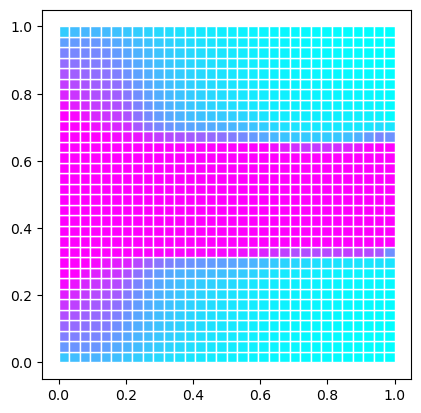

Obj 20.874269768291942 frac 0.4999817484803636
Obj 14.354882756445987 frac 0.500009674732685
Obj 11.737357076704857 frac 0.5000086973476976
Obj 10.68418156385172 frac 0.5000074612061434
Obj 10.116109752762357 frac 0.5000052072460257


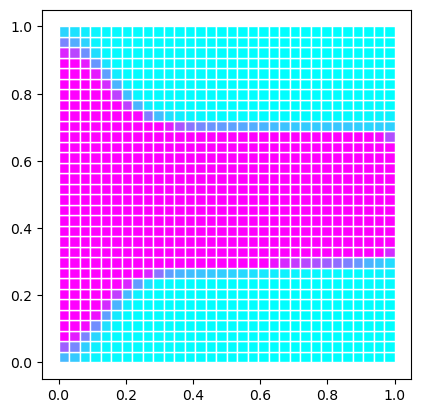

Obj 9.921745648245238 frac 0.4999927201336721
Obj 9.87459367382274 frac 0.5000032133240901
Obj 9.850400269402458 frac 0.49999498834988393
Obj 9.839352325654582 frac 0.5000036521584471
Obj 9.831423946073485 frac 0.5000023132348279


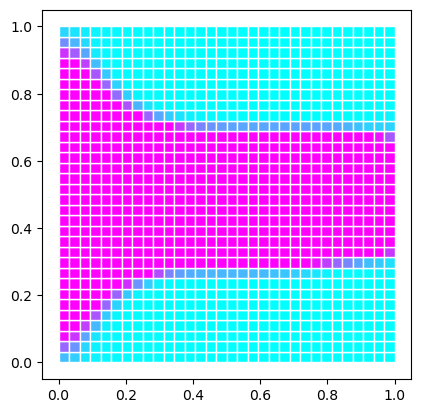

Obj 9.827546284058428 frac 0.49999784529600333
Obj 9.82405114310223 frac 0.499996496930762
Obj 9.821213717915114 frac 0.4999996486315829
Obj 9.819716669595296 frac 0.5000051115187589
Obj 9.818434589037619 frac 0.49999924205736046


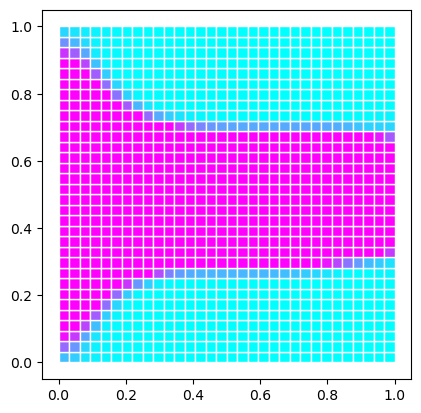

Obj 9.81815862249198 frac 0.49999482660590633
Obj 9.81803467042656 frac 0.5000014488608198
Obj 9.81734956146109 frac 0.49999187893912694
Obj 9.817776594263274 frac 0.5000078872002514
Obj 9.816551980454921 frac 0.49999665253292114


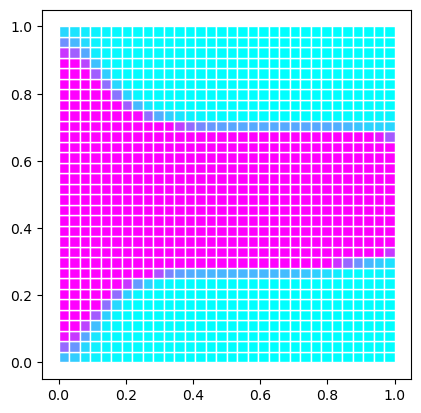

Obj 9.817343179299183 frac 0.49999683307076725
Obj 9.81798638835037 frac 0.49999828059481843


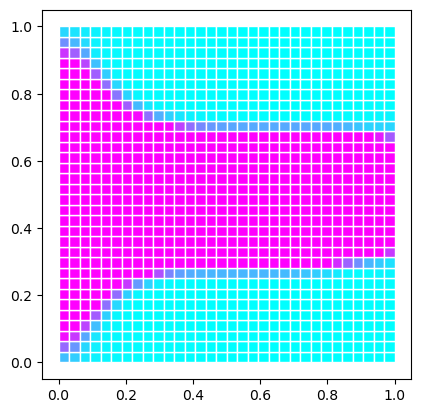

Obj 11.233081701490269 frac 0.5000022328574758
Obj 10.602677973051653 frac 0.5000027763939223
Obj 10.277540693467401 frac 0.5000045693219763
Obj 10.168657355132185 frac 0.49999629454724115
Obj 10.090876897485817 frac 0.500002340321772


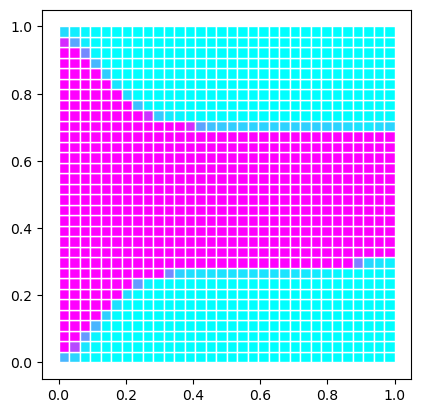

Obj 10.048540601059774 frac 0.4999990935883042
Obj 10.032365619483917 frac 0.5000018784975069
Obj 10.00085247639055 frac 0.5000021603894222
Obj 9.999335055972592 frac 0.5000018298161677
Obj 9.998913049763054 frac 0.49999870257773327


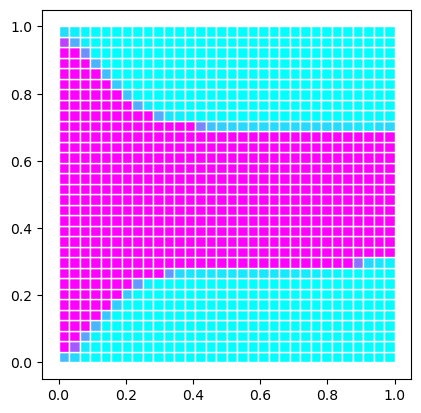

Obj 9.998826916344518 frac 0.4999970952414288
Obj 9.998779665567248 frac 0.5000012909004976
Obj 9.998569945824094 frac 0.5000014699182789
Obj 9.99847990661669 frac 0.4999985593579873


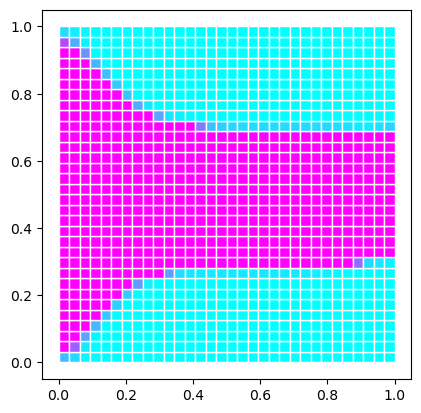

Obj 10.120707254942609 frac 0.49999737308284475
Obj 10.08330782931749 frac 0.4999978699633792
Obj 10.04703274251136 frac 0.49999978007860924
Obj 10.028051104580896 frac 0.500003660309377
Obj 10.013194922293799 frac 0.5000025134598943


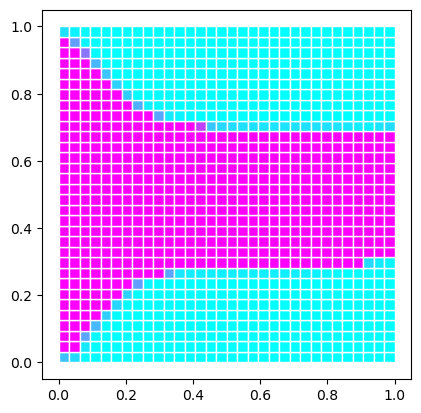

Obj 9.985470580735438 frac 0.4999983461970018
Obj 9.97949238262321 frac 0.4999988252624147
Obj 9.959719880687606 frac 0.49999891892928705
Obj 9.953630162226833 frac 0.4999996694806737
Obj 9.953188573404905 frac 0.500002029925449


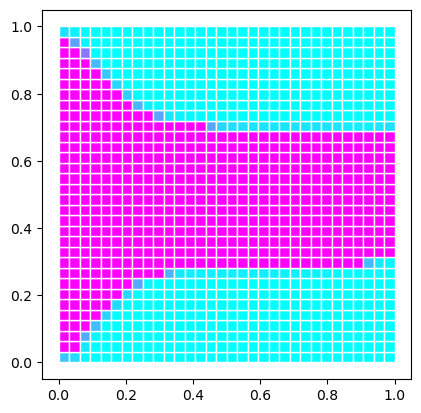

Obj 9.952786209339852 frac 0.49999763496560695
Obj 9.952562599874739 frac 0.4999993421797671
Obj 9.952285308374591 frac 0.499998275978781
Obj 9.952097410727365 frac 0.5000006234790536
Obj 9.951883010175356 frac 0.49999890039406164


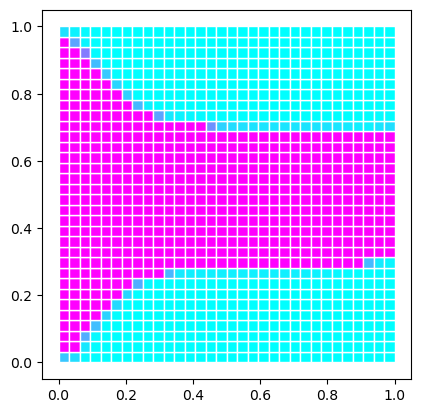

Obj 9.951767270464222 frac 0.4999999921108648


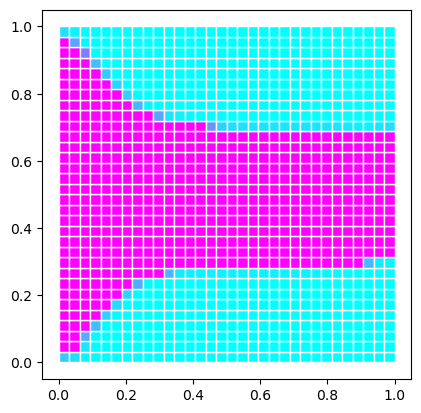

In [25]:
obj = []
frac = []
z=opt_zIni
start =time.time()
iteration=0
for i in range(3):
    Tol=opt_Tol*(opt_zMax-opt_zMin)
    Change=2*Tol
    z_P = opt_zIni_P
    P=opt_P
    P_P = opt_P_P
    E,dEdy,V,dVdy = Q2Q1OPT.MatIntFnc(P*z,np.array([fem_mu0,q[i]]))
    E_P,dEdy_P,V_P,dVdy_P = Q2Q1OPT.MatIntFnc(P_P*z_P,np.array([fem_mu0,q[i]]))
    Iter = 0
    while (Iter<opt_MaxIter) and Change>Tol:
        Iter += 1
        iteration+=1
        g,dgdE,dgdV,fem_ElemArea = Q2Q1OPT.ConstraintFncQ2(fem_NElem,Node,Element,E,V,Volfrac)
        f,dfdE,dfdV = Q2Q1OPT.ObjectiveFnc(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,z,fem_ElemArea,E,V)
        #p_poly,f_new_poly,u_poly,v_poly = PolyFEM.PolyFEM(Node_P,Element_P,NodeBC_P,z)
        dfdz = P.T*(np.multiply(dEdy,dfdE)+np.multiply(dVdy,dfdV))
        dgdz = P.T*(np.multiply(dEdy,dgdE)+np.multiply(dVdy,dgdV))
        z,Change = Q2Q1OPT.UpdateScheme(dfdz,g,dgdz,z,opt_zMin,opt_zMax,opt_OCMove,opt_OCEta)
        E,dEdy,V,dVdy = Q2Q1OPT.MatIntFnc(P*z,np.array([fem_mu0,q[i]]))
        print('Obj',f*1000,'frac',z.sum()/fem_NElem)
        obj.append(f*1000)
        frac.append(z.sum()/fem_NElem)
        if Iter%5==0:
            Q2Q1OPT.Plot_patch(nelm,Node_P,Element_P,z,1,0,cmap='cool')
    Q2Q1OPT.Plot_patch(nelm,Node_P,Element_P,z,1,0,cmap='cool')
end = time.time()

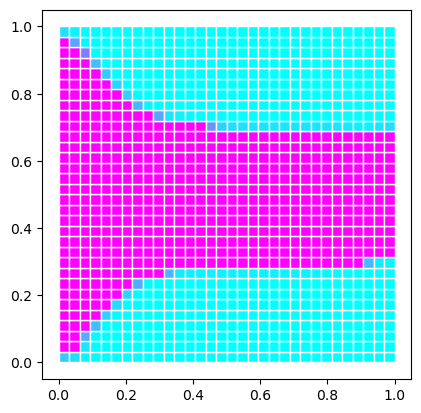

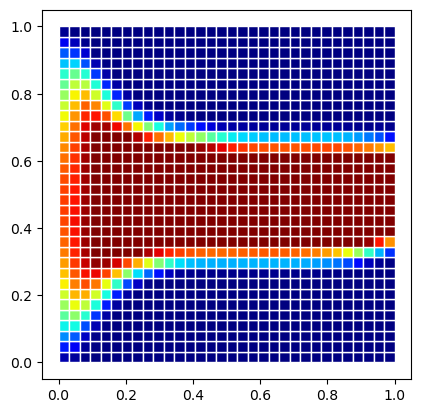

30.0567664395854
0.4999999921108651
57
350.3755362033844


In [13]:
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,z,1,0,cmap='cool')
p,f_new,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,z) #original
p_poly,f_new_poly,u_poly,v_poly = PolyFEM.PolyFEM(Node_P,Element_P,NodeBC_P,z)
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u**2+v**2)),1.2,0,cmap='jet')
print(f_new_poly)
print(sum(z)/fem_NElem)
print(iteration)
print(end-start)

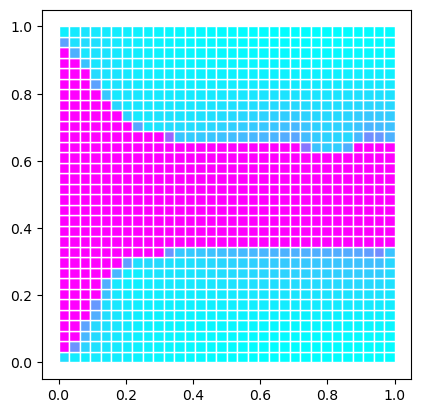

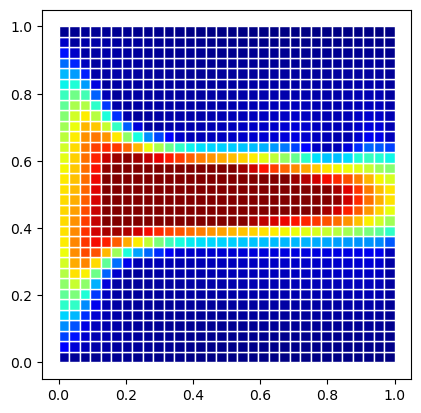

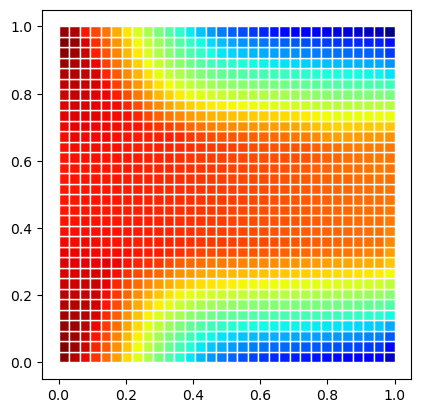

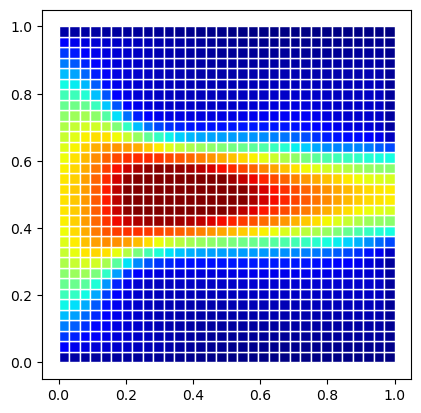

19.772220302805742


In [7]:
p,f_new,u,v = Q2Q1FEM.Q2Q1FEM(Node,Element,NodeBC,Node_P,Element_P,NodeBC_P,z) #original
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,z,1,0,cmap='cool')
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u**2+v**2)),1.5,0,cmap='jet')
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,p,max(p),min(p),cmap='jet')
p_poly,f_new_poly,u_poly,v_poly = PolyFEM.PolyFEM(Node_P,Element_P,NodeBC_P,z)
Q2Q1FEM.Plot_patch(nelm,Node_P,Element_P,(np.sqrt(u_poly**2+v_poly**2)),1.5,0,cmap='jet')
print(f_new_poly)

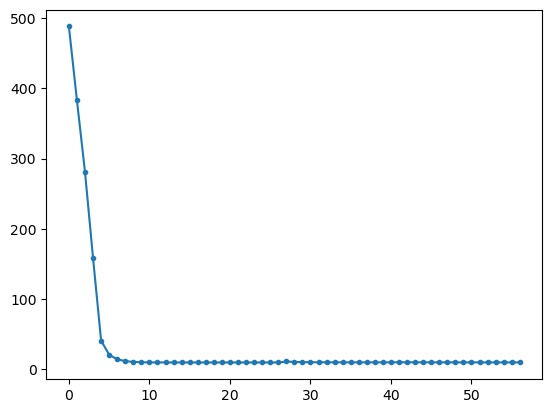

In [26]:
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
ax1.plot(obj,label="Objective function", marker='.')
# ax2.plot(frac,label='Volume fraction',color='r')
# ax2.plot([0,len(frac)],[0.5,0.5],color='b')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
#ax1.legend(handler1 + handler2, label1 + label2,frameon=False)